

## Larva Tech Academy — Data Analysis Certification Exam Result Analysis

Larva Tech Academy has contracted you to analyze the dataset of all candidates who have applied for and taken the **Data Analysis Professional Certification Exam**.

Your task is to conduct a comprehensive analysis and present your findings to the **Board of Directors**. The board is particularly interested in understanding:

-  The **Eligibility Status** of each candidate  
-  The **key reasons** why certain candidates are **ineligible** for certification

  
You are expected to produce:

1. A **summary table** showing each candidate’s:
   - Student ID  
   - Eligibility Status  
   - Reason for Ineligibility (leave blank for eligible candidates)

2. Visualizations that show:
   - The overall distribution of eligibility status  
   - The most common reasons for ineligibility

3. A brief **report** summarizing your findings and any notable patterns or recommendations


In [43]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cert = pd.read_excel(r"C:\Users\USER\Desktop\DATA ANALYSIS CLASS\VSCODE\DATASET\PROJECT\cert_data-2 (2).xlsx")
cert.head()

,Student ID,Payment Status,Data Manipulation,SQL Query,Data Visualization,Statistics,Python Coding,English Comunication
0,333,Paid,63,36,75,30,52,59
1,980,Paid,22,82,87,29,32,87
2,416,Paid,23,99,91,25,34,67
3,907,Paid,26,79,80,44,41,76
4,661,Paid,49,77,30,31,33,55


In [44]:
# create an average score column
cert["Average"] = cert.iloc[:,2:8].mean(axis = 1).round(2)

# create an eligibility column based on certain conditions to show eligible and ineligible students
cert["Eligibility"] = np.where((cert["Payment Status"] == "Paid") & (cert["Data Manipulation"] >= 60) &
                                (cert["SQL Query"] >= 55) & (cert["Data Visualization"] >= 60) &
                                (cert["Statistics"] >= 50) & (cert["Python Coding"] >= 65) &
                                (cert["English Comunication"] >= 50) & (cert["English Comunication"] >= 50), 
                               "Eligible", "Ineligible")

# create a column for reason for Ineligibility
cert["Reason for Ineligibility"] = np.where(cert["Payment Status"] != "Paid", "Payment not completed",
                   np.where(cert["Data Manipulation"] < 60, "Data Manipulation score less than 60",
                    np.where(cert["SQL Query"] < 55, " SQL Query score less than 55",
                    np.where(cert["Data Visualization"] < 60, "Data Visualization score less than 60",
                    np.where(cert["Statistics"] < 50, "Statistics score less than 50",
                    np.where(cert["Python Coding"] < 65, "Python coding score less than 65",
                    np.where(cert["English Comunication"] < 50, "English communication less than 50",
                    np.where(cert["English Comunication"] < 50, "Avearage less than 50",
                             " "))))))))


cert.head()


,Student ID,Payment Status,Data Manipulation,SQL Query,Data Visualization,Statistics,Python Coding,English Comunication,Average,Eligibility,Reason for Ineligibility
0,333,Paid,63,36,75,30,52,59,52.50,Ineligible,SQL Query score less than 55
1,980,Paid,22,82,87,29,32,87,56.50,Ineligible,Data Manipulation score less than 60
2,416,Paid,23,99,91,25,34,67,56.50,Ineligible,Data Manipulation score less than 60
3,907,Paid,26,79,80,44,41,76,57.67,Ineligible,Data Manipulation score less than 60
4,661,Paid,49,77,30,31,33,55,45.83,Ineligible,Data Manipulation score less than 60


In [45]:
# Create a summary table to show Reasons for ineligibility
new_data = pd.DataFrame({"Student ID" : cert["Student ID"], "Eligibility Status": cert["Eligibility"],
                         "Reason for Ineligibility" : cert["Reason for Ineligibility"]})

new_data.sort_values(by = "Student ID")


,Student ID,Eligibility Status,Reason for Ineligibility
748,1,Ineligible,SQL Query score less than 55
485,2,Ineligible,Data Manipulation score less than 60
160,3,Ineligible,Payment not completed
116,4,Ineligible,SQL Query score less than 55
498,5,Eligible,
...,...,...,...
280,1009,Ineligible,Data Visualization score less than 60
952,1010,Ineligible,Python coding score less than 65
149,1011,Ineligible,SQL Query score less than 55
35,1012,Ineligible,Data Visualization score less than 60


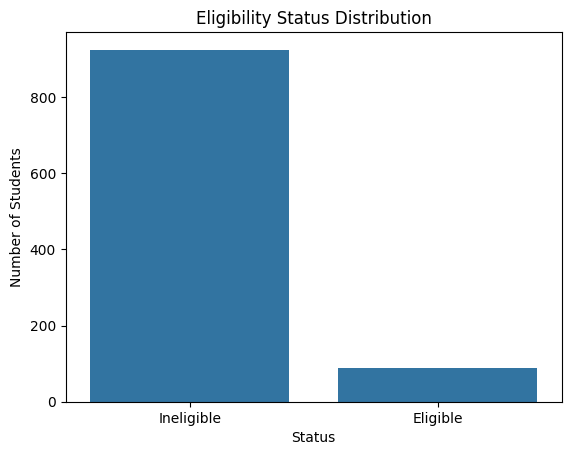

In [46]:
# Visualize your findings 
# Barplot to show students' eligibility status
sns.barplot(x = new_data["Eligibility Status"].value_counts().index,
            y = new_data["Eligibility Status"].value_counts().values)
plt.title('Eligibility Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Students')
plt.show()

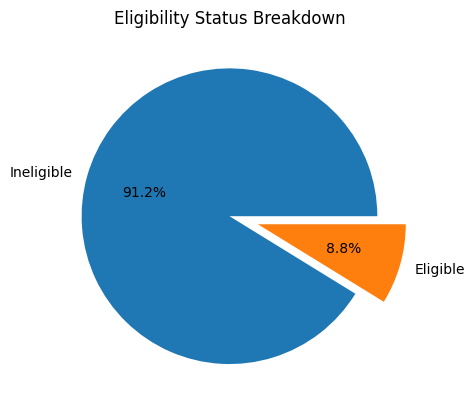

In [47]:
# Pieplot shows students Eligibility proportion
plt.pie(new_data["Eligibility Status"].value_counts(),
        labels = new_data["Eligibility Status"].value_counts().index,
        autopct= "%1.1f%%",
        explode= [0,.2])

plt.title('Eligibility Status Breakdown')
plt.ylabel('')

plt.show()

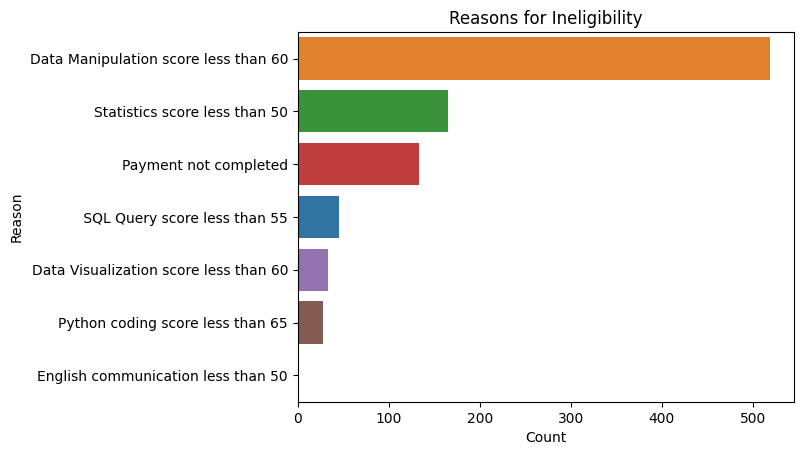

In [49]:
# Countplot to visualize the most common reasons for ineligibility
# Filter out eligible students
ineligible_df = new_data[new_data['Eligibility Status'] == 'Ineligible']

sns.countplot(y='Reason for Ineligibility', data=ineligible_df,
               order=ineligible_df['Reason for Ineligibility'].value_counts().index,
               hue= ineligible_df['Reason for Ineligibility'])
plt.title('Reasons for Ineligibility')
plt.xlabel('Count')
plt.ylabel('Reason')

plt.show()




###  Summary of Findings

The analysis reveals that approximately **91% of candidates** who took the Data Analysis Professional Certification Exam at Larva Tech Academy were **ineligible** for certification.

The reasons for ineligibility vary, including:

- Failure to meet the **cutoff marks** for certain compulsory courses  
- **Incomplete payment** of certification fees

However, the most common reason for ineligibility is the **failure to achieve the required 60% cutoff** in the **Data Manipulation segment** of the exam. Over **500 candidates** scored below this threshold, making it the leading factor contributing to ineligibility.

---

###  Recommendation

It is recommended that the **Board of Directors**:

1. **Review the structure and grading criteria** of the certification exam, particularly the Data Manipulation segment  
2. Develop and distribute a **comprehensive preparation manual** to guide future applicants toward successful completion of the exam
